In [1]:
import torch
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")
print(torch.backends.mps.is_built())


tensor([1.], device='mps:0')
True


In [2]:
from lightning.pytorch import Trainer
trainer = Trainer(accelerator='mps', devices=1)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/bms20/anaconda3/envs/uce/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default


In [114]:
import anndata
import os
import numpy as np

ad = anndata.read_h5ad(os.path.expanduser('~/Downloads/ot.h5ad'))

sc.pp.filter_cells(ad, min_genes=1)
sc.pp.filter_genes(ad, min_cells=1)
# ad.X = (ad.X.toarray()*1000)
ad.write_h5ad('data/ot.h5ad')

In [115]:
# ## remove any rows contain all the same values
# ad = ad[~np.all(ad.X.A == ad.X.A[0], axis=1)]
# ## get columnwise variance
# var = ad.X.toarray().var(axis=1)
# sum(var==0)
# sum(ad.var.index.duplicated())
ad.shape[1]

10920

In [5]:
!python eval_single_anndata.py --adata_path data/ot.h5ad --dir output/ot/ --species human --model_loc model_files/4layer_model.torch --batch_size 100 --filter False --skip False


Proccessing ot
10.0
ot (20194, 19130)
Wrote Shapes Dict
19130
Max Code: 613
Loaded model:
model_files/4layer_model.torch
  2%|▊                                          | 4/202 [00:43<33:45, 10.23s/it]

In [85]:
ad2=anndata.read_h5ad('output/ot/ot_proc.h5ad')

In [105]:
np.nan_to_num([0,np.nan,1], nan=0.00001)

array([0.e+00, 1.e-05, 1.e+00])

In [89]:
ad2

AnnData object with n_obs × n_vars = 12031 × 18420
    obs: 'orig.ident', 'nCount_score', 'nFeature_score', 'file', 'study_id', 'n_cases', 'n_initial', 'n_replication', 'pmid', 'pub_author', 'pub_date', 'pub_journal', 'pub_title', 'has_sumstats', 'num_assoc_loci', 'source', 'trait_reported', 'trait_category', 'id', 'datasourceId', 'db', 'efo_id', 'mondo_id', 'doid_id', 'hp_id', 'orphanet_id', 'go_id', 'chebi_id', 'uberon_id', 'mp_id', 'omit_id', 'pato_id', 'hancestro_id', 'ncbitaxon_id', 'score_snn_res.0.8', 'seurat_clusters', 'n_genes'
    var: 'input_gene', 'ortholog_gene', 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'n_cells'
    uns: 'neighbors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances'

KeyError: 'cell_type'

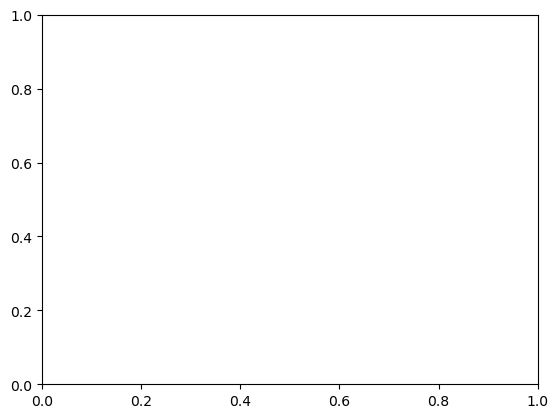

In [19]:
import scanpy as sc

# plot X_uce reduction
sc.pp.neighbors(ad2, use_rep="X_uce")
sc.tl.umap(ad2)


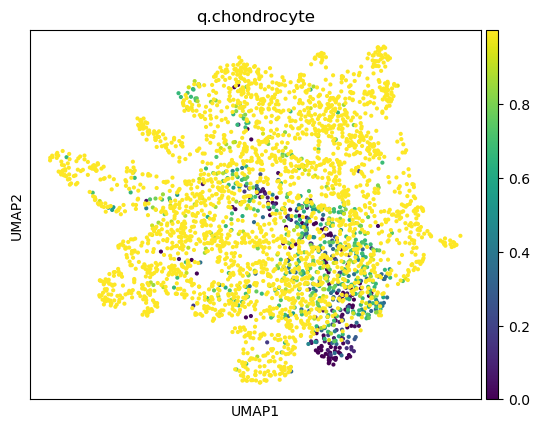

In [23]:
sc.pl.umap(ad2, color="q.chondrocyte")


In [15]:
ad_tmp

AnnData object with n_obs × n_vars = 11990 × 12000
    obs: 'n_counts', 'batch', 'labels', 'str_labels', 'cell_type'
    var: 'gene_symbols', 'n_counts-0', 'n_counts-1', 'n_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cell_types', 'hvg'
    obsm: 'design', 'normalized_qc', 'qc_pc', 'raw_qc'